### Môn Lập trình cho khoa học dữ liệu
#### Giảng viên: Trần Trung Kiên


<h1><center>Đồ án cuối kỳ</center></h1>

MSSV |	Họ và tên | Tên tài khoản github
--- | --- | ---
19120186 |	Đỗ Lê Khánh Đăng | dolekhanhdang
19120412 |	Nguyễn Minh Tú   |  tuak123ax

### 1. Về dữ liệu
Dữ liệu này về lương của những công việc liên quan đến data: data scientist, data engineer, .... <br />
Nguồn: https://www.kaggle.com/nikhilbhathi/data-scientist-salary-us-glassdoor. <br />
Trong mục mô tả của dữ liệu:<br />
- The dataset is scraped from the Glassdoor website using Selenium scrapper. After scrapping, the raw dataset was cleaned and made usable for performing data analysis and modelling. The dataset contains information about the minimum salary, maximum salary, average salary, job description, age of the company in years, etc.
- Dữ liệu được lấy bằng cách scraped từ website của Glassdoor với Selenium scrapper. Sau khi lấy, dữ liệu đã được xử lý phù hợp cho phân tích dữ liệu và mô hình hóa. Tập dữ liệu chứa thông tin về mức lương tối thiểu, tối đa, trung bình, mô tả công việc, tuổi đời công ty,..

### 2. Khám phá dữ liệu 

Các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np

Đọc dữ liệu

In [2]:
data = pd.read_csv('data_cleaned_2021.csv',index_col='index')
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
index,,,,,,,,,,,,,,,,,,,,,
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


#### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows = data.shape[0]
num_cols = data.shape[1]
print('Num rows =',num_rows)
print('Num cols =',num_cols)

Num rows = 742
Num cols = 41


Dữ liệu có 742 dòng và 42 cột

#### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Như trong mô tả, mỗi dòng là một công việc liên quan đến data và các thông tin liên quan đến công việc đó.

#### Dữ liệu có các dòng bị lặp không?

In [4]:
data.duplicated().sum()

275

Hmm, vậy là có 275 dòng bị lặp. Việc dể lại cũng không mang lợi ích gì nên bây giờ nên loại chúng luôn.

In [5]:
data = data.drop_duplicates()
data.duplicated().sum()

0

#### Mỗi cột có ý nghĩa gì?

In [6]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

- Job Title : Tên công việc, vd như data scientist, junior data scientist, senior data scientist, etc ... <br />
- Salary Estimate: Khoảng lương và nguồn lấy được.<br />
- Job Description: Mô tả công việc, công ty mong muốn gì từ vị trí này.<br />
- Rating: Rating của công ty.<br />
- Company Name: Tên công ty.<br />
- Location: Địa điểm tuyển dụng.<br />
- Headquarters: Địa chỉ trụ sở công ty.<br />
- Size: Ước tính số lượng nhân viên của công ty.<br />
- Founded: Năm công ty được thành lập.<br />
- Type of ownership: Công ty thuộc chính phủ, tư nhân hay các loại khác.<br />
- Industry: Công ty hoạt động chủ yếu trong ngành công nghiệp nào, IT industry, Pharmaceutical industry , etc...<br />
- Sector: Lĩnh vực mà công ty hoạt động.<br />
- Revenue: Tổng lợi nhuận của công ty mỗi năm. <br />
- Competitors:  Các đối thủ cạnh tranh hiện tại của công ty.<br />
- Hourly: 1 nếu lương này là theo giờ, 0 là các loại khác. <br />
- Employer provided: Mức lương được cung cấp bởi công ty hay không? <br />
- Lower Salary: Mức lương tối thiểu được báo cáo . <br />
- Upper Salary: Mức lương tối đa được báo cáo cho .<br />
- Avg Salary(K): Mức lương trung bình .<br />
- company_txt: chứa tên công ty. <br />
- Job Location: Bang của nơi tuyển dụng.<br />
- Age: Tuổi của công ty, tính bằng năm. <br />
- Python:  Nếu kỹ năng Python là bắt buộc thì là 1. Còn lại là 0.<br />
- spark: Nếu kỹ năng Spark là bắt buộc thì là 1. Còn lại là 0.<br />
- aws: Nếu kỹ năng aws là bắt buộc thì là 1. Còn lại là 0.<br />
- excel: Nếu kỹ năng excel là bắt buộc thì là 1. Còn lại là 0.<br />
- sql: Nếu kỹ năng SQL là bắt buộc thì là 1. Còn lại là 0.<br />
- sas: Nếu kỹ năng SAS là bắt buộc thì là 1. Còn lại là 0.<br />
- keras: Nếu kỹ năng Keras là bắt buộc thì là 1. Còn lại là 0.<br />
- pytorch: Nếu kỹ năng Pytorch là bắt buộc thì là 1. Còn lại là 0.<br />
- scikit: Nếu kỹ năng Scikit là bắt buộc thì là 1. Còn lại là 0.<br />
- tensor: Nếu kỹ năng Tensor là bắt buộc thì là 1. Còn lại là 0.<br />
- hadoop: Nếu kỹ năng Hadoop là bắt buộc thì là 1. Còn lại là 0.<br />
- tableau: Nếu kỹ năng tableau là bắt buộc thì là 1. Còn lại là 0.<br />
- bi: Nếu kỹ năng PowerBi là bắt buộc thì là 1. Còn lại là 0.<br />
- flink: Nếu kỹ năng Flink là bắt buộc thì là 1. Còn lại là 0.<br />
- mongo: Nếu kỹ năng MongoDB là bắt buộc thì là 1. Còn lại là 0.<br />
- google_an: Nếu chứng chỉ Google analytics là bắt buộc thì là 1. Còn lại là 0.<br />
- job_title_sim: Đơn giản hóa tên công việc. <br />
- seniority_by_title: Thâm niên . <br />
- Degree: 
M: Nếu chức danh công việc yêu cầu bằng cấp hoặc cung cấp số năm kinh nghiệm để có được nó. P: Nếu chức danh công việc yêu cầu bằng cấp hoặc cung cấp số năm kinh nghiệm. <br />

#### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
data.dtypes

Job Title              object
Salary Estimate        object
Job Description        object
Rating                float64
Company Name           object
Location               object
Headquarters           object
Size                   object
Founded                 int64
Type of ownership      object
Industry               object
Sector                 object
Revenue                object
Competitors            object
Hourly                  int64
Employer provided       int64
Lower Salary            int64
Upper Salary            int64
Avg Salary(K)         float64
company_txt            object
Job Location           object
Age                     int64
Python                  int64
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
keras                   int64
pytorch                 int64
scikit                  int64
tensor                  int64
hadoop                  int64
tableau   

Có vẻ không có vấn đề gì với kiểu dữ liệu của các cột.

#### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

In [8]:
data.describe()

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,3.651820,1832.441113,0.021413,0.021413,74.783726,128.312634,101.548180,45.605996,0.556745,0.237687,...,0.040685,0.051392,0.079229,0.102784,0.175589,0.211991,0.083512,0.017131,0.051392,0.017131
std,0.805355,508.661732,0.144913,0.144913,29.920107,43.941982,36.381891,52.491641,0.497302,0.426123,...,0.197772,0.221032,0.270386,0.304002,0.380878,0.409157,0.276951,0.129897,0.221032,0.129897
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,1939.000000,0.000000,0.000000,53.500000,98.000000,76.250000,11.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1991.000000,0.000000,0.000000,71.000000,124.000000,97.500000,25.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.100000,2007.000000,0.000000,0.000000,90.500000,150.000000,121.000000,56.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Giá trị max của các cột thì không có gì bất thường, tuy nhiên các giá trị min có vài chỗ là -1 như Rating,Age,... Lý do bởi vì trong lúc thu thập dữ liệu, những chỗ nào không có hay không thu nhập được thì tác giả sẽ để là -1. Như vậy để lúc sau tính tỷ lệ giá trị thiếu, ta sẽ thay những giá trị = -1 bằng np.nan

In [9]:
data = data.replace(-1,np.nan)
data = data.replace('-1',np.nan)
data.describe()

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,460.000000,434.000000,467.000000,467.000000,467.000000,467.000000,467.000000,434.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,3.722609,1971.850230,0.021413,0.021413,74.783726,128.312634,101.548180,49.149770,0.556745,0.237687,...,0.040685,0.051392,0.079229,0.102784,0.175589,0.211991,0.083512,0.017131,0.051392,0.017131
std,0.568729,52.794282,0.144913,0.144913,29.920107,43.941982,36.381891,52.794282,0.497302,0.426123,...,0.197772,0.221032,0.270386,0.304002,0.380878,0.409157,0.276951,0.129897,0.221032,0.129897
min,1.900000,1744.000000,0.000000,0.000000,15.000000,16.000000,15.500000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,1958.750000,0.000000,0.000000,53.500000,98.000000,76.250000,13.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.750000,1995.000000,0.000000,0.000000,71.000000,124.000000,97.500000,26.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.100000,2008.000000,0.000000,0.000000,90.500000,150.000000,121.000000,62.250000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Giá trị min đã trở lại bình thường. Giờ ta sẽ xem tỷ lệ thiếu của các cột.

In [10]:
list_numerics = data.describe().columns.tolist()
data[list_numerics].isnull().sum()

Rating                7
Founded              33
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
Age                  33
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
dtype: int64

Chỉ có 3 cột có giá trị thiếu là Rating, Founded, Age

#### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ở các cột categorical thì những giá trị thiếu được biểu diễn bằng chuỗi 'na' (not available). Vậy ra sẽ thay các chuỗi đó bằng np.nan trước khi tính các giá trị thiếu.

In [11]:
data = data = data.replace('na',np.nan)

In [12]:
list_cate = [ index for index in data.columns.tolist() if index not in list_numerics]
data[list_cate].isnull().sum()

Job Title               0
Salary Estimate         0
Job Description         0
Company Name            0
Location                0
Headquarters            1
Size                    0
Type of ownership       0
Industry                7
Sector                  7
Revenue                 0
Competitors           285
company_txt             0
Job Location            0
job_title_sim           6
seniority_by_title    340
Degree                245
dtype: int64

Competitors và Headquarters, Sector, Industry, seniority_by_title, Degree đêu có giá trị thiếu 

Số lượng các giá trị khác nhau

In [13]:
data[list_cate].nunique()

Job Title             264
Salary Estimate       416
Job Description       463
Company Name          343
Location              200
Headquarters          197
Size                    8
Type of ownership       9
Industry               59
Sector                 24
Revenue                13
Competitors           127
company_txt           343
Job Location           37
job_title_sim           9
seniority_by_title      2
Degree                  2
dtype: int64

In [14]:
for col in list_cate:
    print(data[col].unique()[:3])

['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist']
['$53K-$91K (Glassdoor est.)' '$63K-$112K (Glassdoor est.)'
 '$80K-$90K (Glassdoor est.)']
['Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\nExcellent verbal and written communication skills, and quantitative analytical skills are required\nApplicant must be able to work in a team environment\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\n

Có vẻ không có vấn đề gì

### 3. Các câu hỏi ý nghĩa cần trả lời

### Câu hỏi: Những công việc nào có mức lương trung bình cao nhất?

Ý nghĩa: trả lời được câu hỏi này sẽ giúp ta biết được công việc nào sẽ có mức lương thế nào để sau này có thể chọn cho mình một công việc có mức lương mà mình mong muốn.

#### Khám phá và xử lý dữ liệu để trả lời

Chúng ta sẽ dựa vào dữ liệu ở cột 'Job Title' và 'Avg Salary(K)' để trả lời câu hỏi này.

#### Bước 1:

Liệt kê tên các công việc khác nhau và lưu vào biến list_job.

In [15]:
list_job=data['Job Title'].unique().tolist()

#### Bước 2:

Với mỗi công việc, ta sẽ tạo ra 1 dataframe phụ chứa tất cả thông tin của công việc đó và tính giá trị trung bình của cột 'Avg Salary(K)' để được giá trị lương trung bình của công việc đó.

In [16]:
def CalculateSalary(list_job):
    result_sr=pd.Series(index=list_job,dtype='float64')
    for job in list_job:
        temp_df=data[data['Job Title']==job]
        avgofJob=temp_df['Avg Salary(K)'].mean()
        result_sr[job]=avgofJob
    return result_sr

#### Bước 3:

Tạo series 'result_series' trong đó index là tên công việc và value là lương trung bình của công việc đó(sort giá trị theo thứ tự từ bé đến lớn để dễ quan sát) 

In [17]:
result_series=CalculateSalary(list_job)
result_series=result_series.sort_values(ascending=False)
result_series

Director II, Data Science - GRM Actuarial                 254.0
Principal Machine Learning Scientist                      232.5
Principal Data Scientist with over 10 years experience    225.0
Lead Data Engineer                                        205.0
Director II, Data Science - GRS Predictive Analytics      194.5
                                                          ...  
Medical Technologist / Clinical Laboratory Scientist       41.5
Data Analytics Manager                                     40.5
Project Scientist                                          39.5
Associate Data Analyst                                     38.5
Senior Operations Data Analyst, Call Center Operations     27.5
Length: 264, dtype: float64

In [18]:
len(result_series)

264

Như ta thấy thì 'result_series' chứa đến 264 phần tử.

Do đó khi ta vẽ biểu đồ sẽ rất khó quan sát.

Vậy nên chúng ta sẽ bỏ bớt các phần tử có giá trị nhỏ hơn hoặc bằng mean của series.

In [19]:
result_series=result_series[result_series > result_series.mean()]
len(result_series)

121

Vẫy còn 121 phần tử (khá nhiều).

Chúng ta tiếp tục bỏ bớt cho tới khi nào còn khoảng 30 giá trị thì dừng.

In [20]:
result_series=result_series[result_series > result_series.mean()]
len(result_series)

52

In [21]:
result_series=result_series[result_series > result_series.mean()]
len(result_series)

24

#### Bước 4:

Từ kết quả ở trên, vẽ barh chart, trong đó trục hoành là mức lương trung bình và trục tung là tên công việc.

Đặt tên trục hoành là 'AVG Salary' và tên trục tung là 'Job Title'

<AxesSubplot:ylabel='Job Title'>

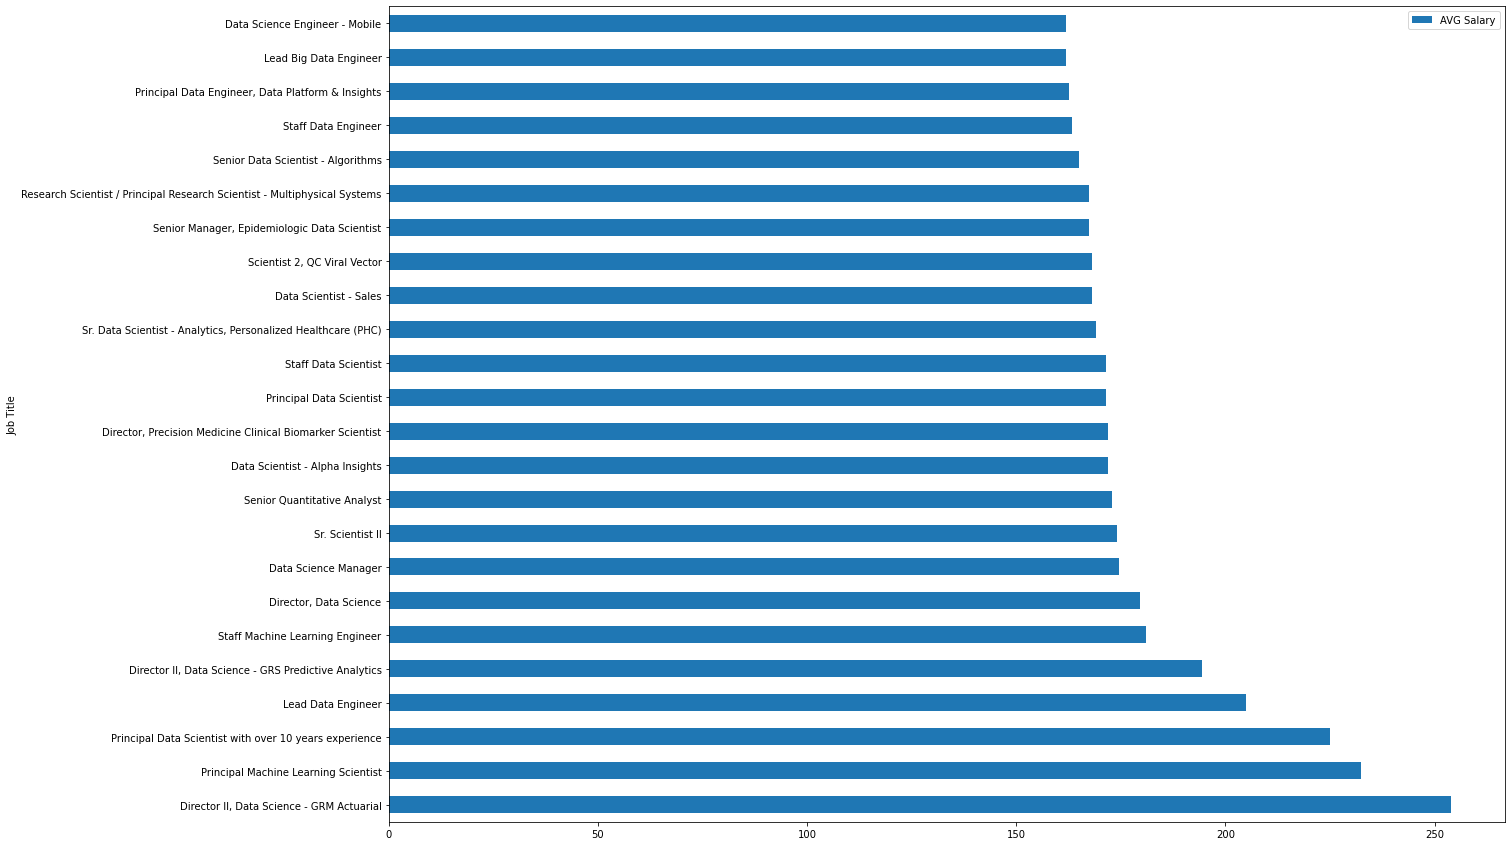

In [22]:
result_df=result_series.to_frame()
result_df.columns=['AVG Salary']
result_df.plot.barh(ylabel='Job Title',figsize=(20,15))

Từ biểu đồ trên ta có thể trả lời câu hỏi:

-Những công việc có mức lương cao nhất là: Director II, Data Science - GRM Actuarial ; Principal Machine Learning Scientist ; Principal Data Scientist with over 10 years experience...

-Vậy những công việc có mức lương cao nhất là những công việc ở vị trí cao như giám đốc, quản lý... hay những công việc cần nhiều kinh nghiệm(>10 năm). Từ đó sinh viên sẽ có mục tiêu rõ ràng hơn để hướng đến.

### Câu hỏi: Trong tất cả các kỹ năng(Python,spark,aws,excel...), những kỹ năng nào là quan trọng nhất?

Ý nghĩa: trả lời được câu hỏi này sẽ giúp ta biết được những kỹ năng cần thiết cho công việc để có thể trau dồi một cách chuẩn xác nhất.

#### Khám phá và xử lý dữ liệu để trả lời

Chúng ta sẽ dựa vào các cột từ vị trí 22 tới vị trí 37 để trả lời câu hỏi này.

#### Bước 1:

Lưu danh sách kỹ năng cần thiết vào 'skill_list'.

In [23]:
skill_list=data.columns[22:38].tolist()
skill_list

['Python',
 'spark',
 'aws',
 'excel',
 'sql',
 'sas',
 'keras',
 'pytorch',
 'scikit',
 'tensor',
 'hadoop',
 'tableau',
 'bi',
 'flink',
 'mongo',
 'google_an']

#### Bước 2:

Ứng với mỗi kỹ năng, ta sẽ tính số lượng công việc cần tới kỹ năng này và lưu vào series 'result_skill' với index là tên kỹ năng và value là số lượng công việc cần đến kỹ năng này.

In [24]:
def Calculate_Num_Needed_Skill(skill_list):
    result_sr=pd.Series(index=skill_list,dtype='float64')
    for skill in skill_list:
        num_yes=data[skill].value_counts()[1]
        result_sr[skill]=num_yes
    return result_sr

In [25]:
result_skill=Calculate_Num_Needed_Skill(skill_list)
result_skill=result_skill.sort_values(ascending=False)
result_skill

Python       260.0
sql          255.0
excel        250.0
spark        111.0
aws          111.0
tableau       99.0
hadoop        82.0
tensor        48.0
sas           42.0
bi            39.0
scikit        37.0
pytorch       24.0
mongo         24.0
keras         19.0
flink          8.0
google_an      8.0
dtype: float64

#### Bước 3:

Từ kết quả ở trên, vẽ barh chart, trong đó trục hoành là số lượng công việc cần đến kỹ năng này và trục tung là tên kỹ năng.

Đặt tên trục hoành là 'Num_Job_Needed' và tên trục tung là 'Skill'

<AxesSubplot:ylabel='Skill'>

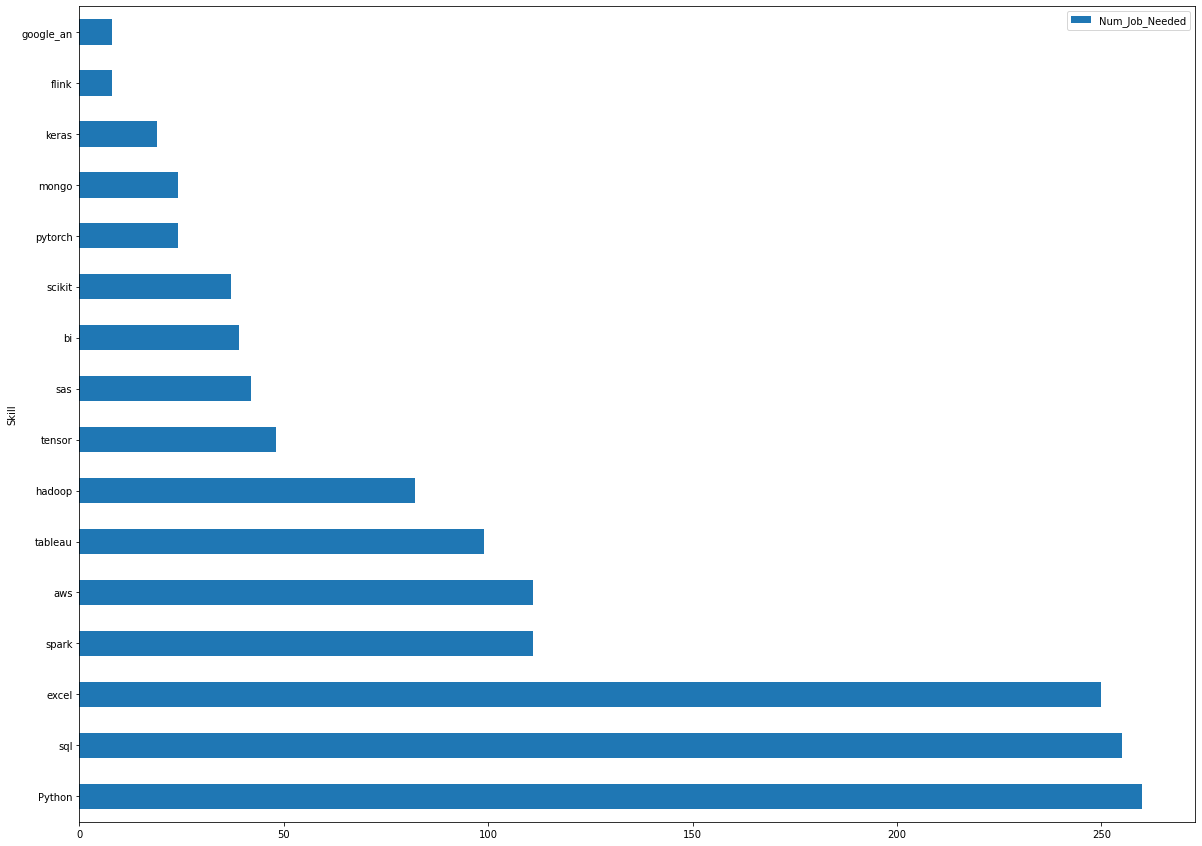

In [26]:
result_skill_df=result_skill.to_frame()
result_skill_df.columns=['Num_Job_Needed']
result_skill_df.plot.barh(ylabel='Skill',figsize=(20,15))

Từ biểu đồ trên ta có thể trả lời câu hỏi:

-Những kỹ năng quan trọng nhất là: Python, sql, excel (số lượng công ty cần các kỹ năng này bỏ xa số lượng công ty cần các kỹ năng khác).

-Từ câu hỏi này ta có thể thấy Python là quan trọng nhất đối với một nhà khoa học dữ liệu. Do đó chúng ta nên rèn luyện kỹ năng Python để sau này có thể kiếm được một công việc ổn định, đồng thời rèn luyện thêm kiến thức về sql và cả excel nữa.